In [1]:
%cd xl-wsd-code
import sys
sys.path.append('./src/nlp-tools')


/home/narefyev/_data/multi-wsi/datasets/xl-wsd/xl-wsd-code


In [64]:
from src.datasets.dataset_utils import get_data, get_allen_datasets, get_dataset


In [3]:
import yaml
with open('./config/config_en_semcor_wngt.test.yaml') as reader:
        config = yaml.load(reader, Loader=yaml.FullLoader)
data_config = config["data"]

In [4]:
langs = data_config["langs"]
# inventory_dir = data_config.get("inventory_dir", None)
inventory_dir = '../xl-wsd/inventories/'
mfs_file = data_config.get("mfs_file", None)
print(len(langs), ' '.join(langs))
print(inventory_dir, mfs_file)

18 en it es fr de zh ca bg eu gl hr da nl et hu ja ko sl
../xl-wsd/inventories/ None


In [5]:
lemma2synsets, mfs_dictionary, label_vocab = get_data(langs, mfs_file, inventory_dir=inventory_dir )

len(lemma2synsets.lang2inventory['bg'].keys())

13497

In [6]:
import os
import torch
test_label_mapper = None
test_lang2name = data_config["test_names"]
test_pos = None
# encoder_name = 'bert-base-multilingual-cased'
test_data_root = '../xl-wsd/evaluation_datasets/'
encoder_name = '/home/narefyev/_data/transformers-xlmr-large'
device = 'cpu'
lang2test_paths = {lang: [os.path.join(test_data_root, name, name + ".data.xml") for name in names] for lang, names
                   in test_lang2name.items()}
test_dss = {lang: [get_allen_datasets(encoder_name, lemma2synsets,
                                          label_vocab, test_label_mapper, config["data"]["max_segments_in_batch"],
                                          {lang: [tp]}, 
                                          device = torch.device(device), pos=test_pos) for tp in test_paths]
                for lang, test_paths in lang2test_paths.items()}


reading test-en.data.xml: 0it [00:00, ?it/s]/home/narefyev/_data/multi-wsi/datasets/xl-wsd/xl-wsd-code/./src/nlp-tools/nlp_tools/data_io/datasets.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.text_to_instance(unique_token_ids, words, lemmaposs, ids, np.array(labels), lang))
reading test-en.data.xml: 1247it [00:00, 5988.84it/s]
reading test-en-coarse.data.xml: 245it [00:00, 5411.49it/s]
reading dev-en.data.xml: 135it [00:00, 6251.79it/s]
reading test-it.data.xml: 504it [00:00, 4690.32it/s]
reading dev-it.data.xml: 129it [00:00, 4815.12it/s]
reading test-es.data.xml: 358it [00:00, 4842.17it/s]
reading dev-es.data.xml: 90it [00:00, 4723.73it/s]
reading test-fr.data.xml: 236it [00:00, 4701.62it/s]
reading dev-fr.data.xml: 59it [00:00, 3862.40it/s]
reading tes

In [7]:
train_data_root = '../xl-wsd/training_datasets/'

In [18]:
from pathlib import Path
lang2train_paths = {lang: [os.path.join(train_data_root, name, name + ".data.xml") for name in names] for lang, names
                   in test_lang2name.items()}
# train_types = ['semcor','wngt_glosses','wngt_examples']
# train_types = ['semcor']

train_dss = {lang: [get_allen_datasets(encoder_name, lemma2synsets,
                                          label_vocab, test_label_mapper, config["data"]["max_segments_in_batch"],
                                          {p.name.split('_')[-1]: [str(p/f'{p.name}.data.xml')]}, 
                                          device = torch.device(device), pos=test_pos) 
                    for p in Path(train_data_root).glob(f'*{lang}')] for lang in ['bg']}

reading wngt_glosses_bg.data.xml: 64536it [00:09, 6973.59it/s] 
reading wngt_examples_bg.data.xml: 2047it [00:00, 12870.75it/s]
reading semcor_bg.data.xml: 15560it [00:02, 6841.93it/s]


In [90]:
target_lang = 'es'
ds, data_loader = test_dss[target_lang][0]
labeled_tokens = sum((sum(1 for e in ex['ids'].metadata if e is not None) for ex in ds.instances))
print(len(ds), labeled_tokens)
print(ds.instances[0])

358 1851
Instance with fields:
 	 tokens: TextField of length 70 with text: 
 		[Los, de, Ivanovic, ,, heridos, pero, ni, mucho, menos, muertos, ,, necesitaban, hilar, un, par, de,
		jugadas, con, acierto, para, coger, aire, ,, y, en, esas, llegó, la, ametralladora, de,
		Mirza_Teletovic, ,, que, con, tres, triples, casi, consecutivos, y, la, ayuda, de, English, y,
		Ribas, devolvió, el, marcador, a, una, renta, tranquilizadora, (, 54-67, ), ,, que, consiguieron,
		maquillar, los, locales, al, final, del, tercer, cuarto, (, 57-67, ), .]
 		and TokenIndexers : {'tokens': 'PretrainedTransformerMismatchedIndexer'} 
 	 cache_instance_ids: MetadataField (print field.metadata to see specific information). 
 	 ids: MetadataField (print field.metadata to see specific information). 
 	 label_ids: ArrayField with shape: (70,) and dtype: <class 'int'>. 
 	 labels: MetadataField (print field.metadata to see specific information). 
 	 labeled_lemmapos: MetadataField (print field.metadata to see spe

In [57]:
ex=ds.instances[100]

from allennlp.data.fields.metadata_field import MetadataField
for k,v in ex.items():
    print(k, v.metadata if isinstance(v, MetadataField) else v)

tokens TextField of length 69 with text: 
 		[Pero, se, trata, de, una, ventaja, a, largo, plazo, ,, con, un, cierto, grado, de, indeterminación,
		,, pues, el, equipo, puede, quedar, eliminado, a, las, primeras, de, cambio, ,, y, además, con,
		esta, actuación, los, jugadores, cumplen, un, partido, de, sanción, y, pasan, al, segundo, ciclo,
		de, tarjetas, ,, en, el, que, la, suspensión, por, acumulación, de, tarjetas, se, produce, con, una,
		menos, que, en, el, primer, ciclo, .]
 		and TokenIndexers : {'tokens': 'PretrainedTransformerMismatchedIndexer'}
cache_instance_ids [520, 521, 522, 523, 524]
ids [None, None, None, None, None, 'd000.s100.t000', None, None, 'd000.s100.t001', None, None, None, None, None, None, 'd000.s100.t002', None, None, None, 'd000.s100.t003', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 'd000.s100.t004', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, Non

In [120]:
import pandas as pd
dfs = []
for ex in ds.instances:
    df = pd.DataFrame.from_records(((token.text, label) for token, label in zip(ex['tokens'],ex['labels']) if label),
                                  columns=['token', 'labels'])
    df['lang'] = ex['lang'].metadata
    df['lemmapos'] = ex['labeled_lemmapos']
    df['sent_spacetok'] = ' '.join(t.text for t in ex['tokens'])
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)

In [124]:
df.labels.apply(len).value_counts()

1    1453
2     309
3      72
4      15
5       2
Name: labels, dtype: int64

In [61]:
ex['label_ids']

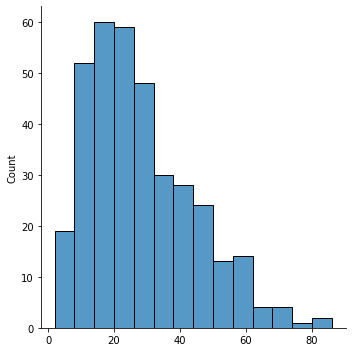

In [59]:
lengths = [len(ex['tokens']) for ex in ds.instances]

import seaborn as sns
sns.displot(lengths)

In [85]:
tokenized = ' '.join(tok.text for tok in ex['tokens'].tokens)

In [86]:
tokenized

'Pero se trata de una ventaja a largo plazo , con un cierto grado de indeterminación , pues el equipo puede quedar eliminado a las primeras de cambio , y además con esta actuación los jugadores cumplen un partido de sanción y pasan al segundo ciclo de tarjetas , en el que la suspensión por acumulación de tarjetas se produce con una menos que en el primer ciclo .'

In [1]:

from mosestokenizer import MosesSentenceSplitter, MosesPunctuationNormalizer, MosesTokenizer, MosesDetokenizer


In [10]:
detokenizer = MosesDetokenizer('en')
s="After a moment 's silence"
print(s, detokenizer(s.split()), sep='\n')
s = '" a brilliant action , " " a glorious engagemement , " -- to say , as one of our generals"'
print(s, detokenizer(s.split()), sep='\n')


After a moment 's silence
After a moment's silence
" a brilliant action , " " a glorious engagemement , " -- to say , as one of our generals"
"a brilliant action," "a glorious engagemement," -- to say, as one of our generals"


In [12]:
detokenizer = MosesDetokenizer('de')
s="Sie wurden auf Rechnung der „ Madame d’ Hayange abgebaut , die sie auf ihren Hütten zu Sainte-Fontaine und Creutzwald verschmolz ."
print(s, detokenizer(s.split()), sep='\n')

Sie wurden auf Rechnung der „ Madame d’ Hayange abgebaut , die sie auf ihren Hütten zu Sainte-Fontaine und Creutzwald verschmolz .
Sie wurden auf Rechnung der „Madame d’ Hayange abgebaut, die sie auf ihren Hütten zu Sainte-Fontaine und Creutzwald verschmolz.
